In [2]:
# 패션 MNIST 데이터
import keras

(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape, test_input.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
# 데이터 구성 
train_target[:10] # 0~9 

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

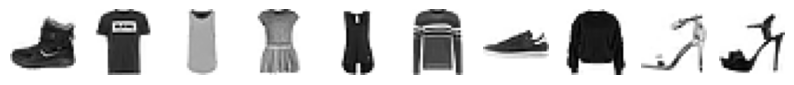

In [9]:
# 훈련세트 이미지 확인 
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()

In [14]:
# 정규화, 0~1 - MinMaxScaler 
# from sklearn.preprocessing import MinMaxScaler 
# ms = MinMaxScaler()
# ms.fit(train_input.reshape(-1, 28 * 28))
# train_scaled = ms.transform(train_input.reshape(-1, 28 * 28))
# train_scaled[0]

# 정규화, 0~1 / 255로 나누는 방법 
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 28 * 28) # 학습을 위한 2차원 배열 구조 변경 28 * 28 -> 784

train_scaled[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# SGDClassifier : 입력층, 출력층만 있는 구조
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sg = SGDClassifier()
cv = cross_validate(sg, train_scaled, train_target, n_jobs=-1, return_train_score=True)
print("훈련세트:", np.mean(cv['train_score']))
print("테스트세트:", np.mean(cv['test_score']))

